In [1]:
from matplotlib import pyplot as plt

In [2]:
datakey, datalabel, datalimit = 'data', 'Cases', 100
if False:
    datakey, datalabel, datalimit = 'deaths', 'Deaths', 17

In [3]:
south_korea_tests = 5832
tests_million = {
    'italy': 3423,
    'germany': 3859,
    'spain': 642,
    'uk': 1007,
    'france': 165,
    'us': 166,
    'switzerland': 505,
}

tests_adjusted = {k: v/south_korea_tests for k, v in tests_million.items()}

In [4]:
import io
import json

infile = io.open('corona-data.json', mode='r', encoding='utf-8')

json_data = json.load(infile)

categories = json_data['categories']
countries = json_data['countries']

if True:
    countries['new york'] = {}
    countries['new york']['population'] = 19540000
    countries['new york']['data'] = [x/2.0 for x in countries['us']['data']]

In [5]:
figkwargs = dict(
    figsize=(9, 9),
    dpi=80,
)
xtickskwargs = dict(
    rotation=45,
)

legendkwargs = dict(
    loc='upper left',
)

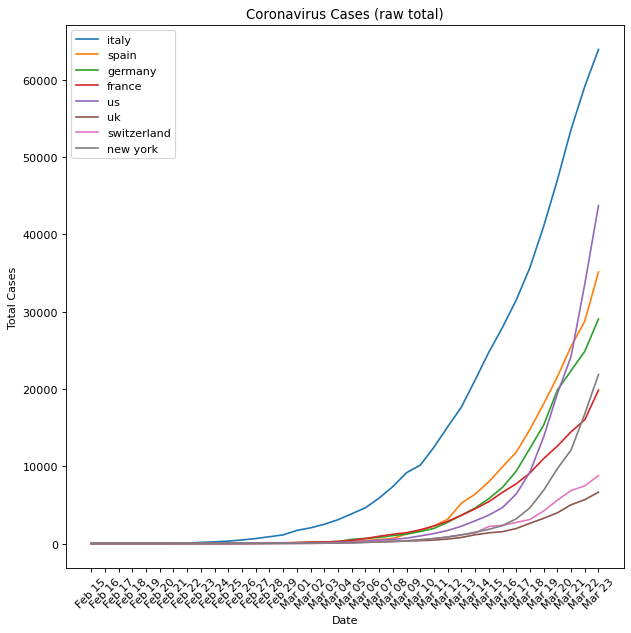

In [6]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    data = cproperties[datakey]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(categories, data, label=country)


plt.title('Coronavirus {} (raw total)'.format(datalabel))
plt.ylabel('Total {}'.format(datalabel))
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()


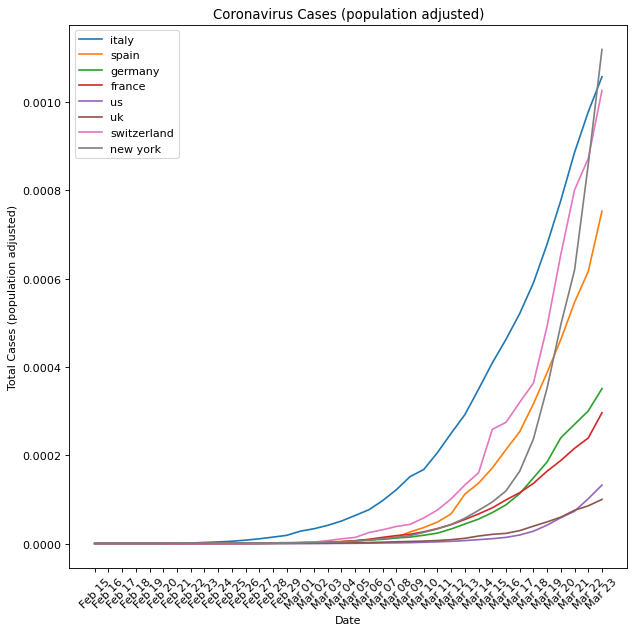

In [7]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(categories, data, label=country)

plt.title('Coronavirus {} (population adjusted)'.format(datalabel))
plt.ylabel('Total {} (population adjusted)'.format(datalabel))
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

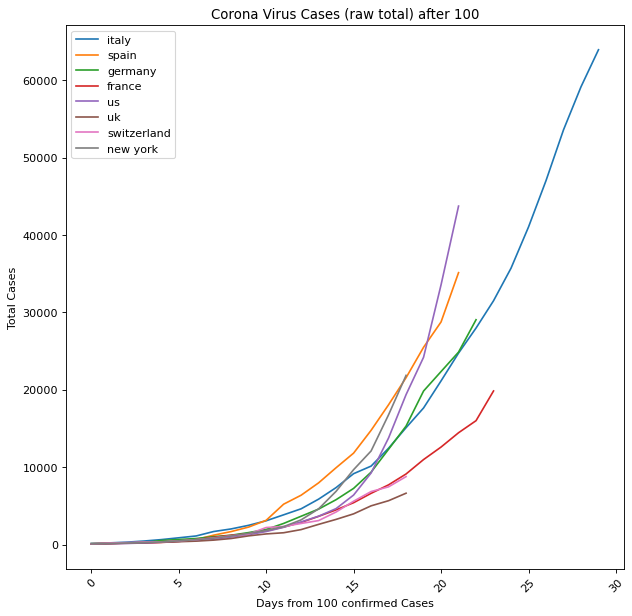

In [8]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x for x in data if x >= datalimit]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Corona Virus {} (raw total) after {}'.format(datalabel, datalimit))
plt.xticks(**xtickskwargs)
plt.ylabel('Total {}'.format(datalabel))
plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
plt.legend(**legendkwargs)
plt.show()

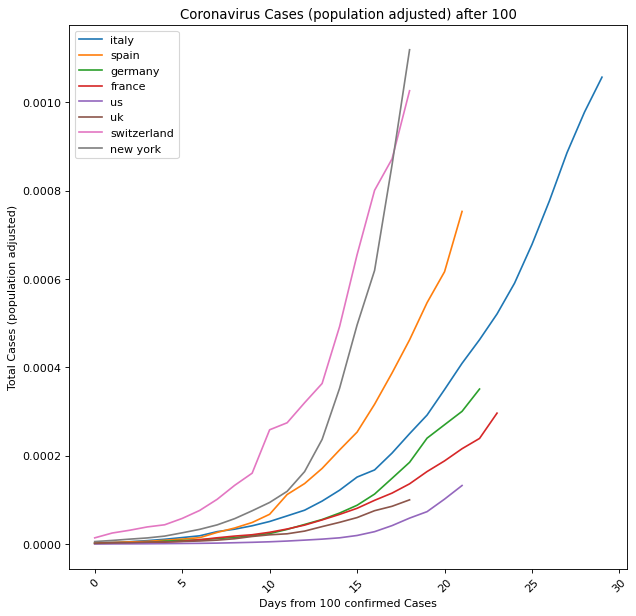

In [9]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x for x in data if x >= 100]
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus {} (population adjusted) after {}'.format(datalabel, datalimit))
plt.ylabel('Total {} (population adjusted)'.format(datalabel))
plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

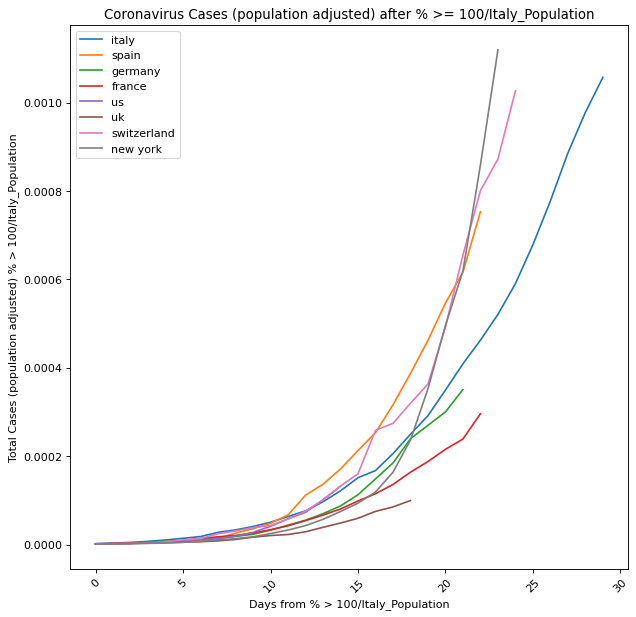

In [10]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus {} (population adjusted) after % >= {}/Italy_Population'.format(datalabel, datalimit))
plt.ylabel('Total {} (population adjusted) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

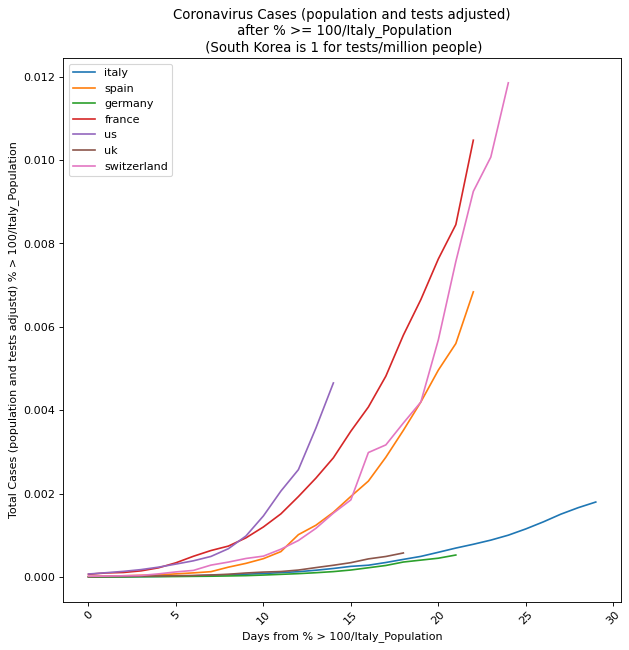

In [11]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
for country, cproperties in countries.items():
    population = cproperties['population']
    try:
        testadj = tests_adjusted[country] 
    except KeyError:
        continue
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data = [x/testadj for x in data]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title(('Coronavirus {} (population and tests adjusted)\n'
           ' after % >= 100/Italy_Population\n'
           ' (South Korea is 1 for tests/million people)').format(datalabel))
plt.ylabel('Total {} (population and tests adjustd) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

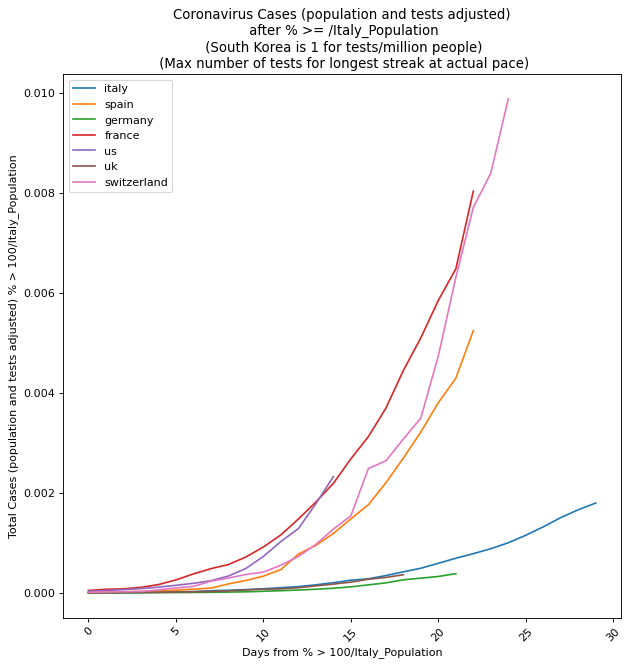

In [12]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
data_store = {}
data_lens = []
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data_lens.append(len(data))
    data_store[country] = data
        
maxlen = max(data_lens)

for country, data in data_store.items():
    try:
        tests = tests_million[country] 
    except KeyError:
        continue

    # How many more tests at the actual pace to match the
    # longest virus streak (which we know is Italy)
    ldata = len(data)
    try:
        test_pace = tests / ldata
    except ZeroDivisionError:
        data = [float('NaN')] * len(categories)
    else:
        # max tests adjusted to korea max
        max_tests = maxlen * test_pace
        testadj = max_tests / south_korea_tests
        data = [x/testadj for x in data]
        data += [float('NaN')] * (len(categories) - len(data))
                                 
    plt.plot(range(len(categories)), data, label=country)


plt.title(('Coronavirus {} (population and tests adjusted)\n'
           ' after % >= /Italy_Population\n'
           ' (South Korea is 1 for tests/million people)\n'
           ' (Max number of tests for longest streak at actual pace)').format(datalabel, datalimit))
plt.ylabel('Total {} (population and tests adjusted) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()